<h1>Content<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Examining-data-from-a-file" data-toc-modified-id="Examining-data-from-a-file-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Examining data from a file</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Data-preprocessing" data-toc-modified-id="Data-preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data preprocessing</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Calculations-and-adding-results-to-the-table" data-toc-modified-id="Calculations-and-adding-results-to-the-table-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Calculations and adding results to the table</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Exploratory-data-analysis" data-toc-modified-id="Exploratory-data-analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exploratory data analysis</a></span><ul class="toc-item"><li><span><a href="#Graphical-analysis" data-toc-modified-id="Graphical-analysis-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Graphical analysis</a></span></li><li><span><a href="#Influencing-factors" data-toc-modified-id="Influencing-factors-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Influencing factors</a></span></li><li><span><a href="#Analysis-by-settlements" data-toc-modified-id="Analysis-by-settlements-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Analysis by settlements</a></span></li><li><span><a href="#Study-of-apartments-in-St.-Petersburg" data-toc-modified-id="Study-of-apartments-in-St.-Petersburg-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Study of apartments in St. Petersburg</a></span></li><li><span><a href="#Research-apartments-in-the-center" data-toc-modified-id="Research-apartments-in-the-center-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Research apartments in the center</a></span></li></ul></li><li><span><a href="#General-conclusion" data-toc-modified-id="General-conclusion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>General conclusion</a></span></li></ul></div>

# Research of advertisements for the sale of apartments

At your disposal is the data of the Yandex Real Estate service - an archive of ads for the sale of apartments in St. Petersburg and neighboring settlements for several years. You need to learn how to determine the market value of real estate. Your job is to set the parameters. This will allow to build an automated system: it will track anomalies and fraudulent activity.

Two types of data are available for each apartment for sale. The first ones are entered by the user, the second ones are obtained automatically on the basis of cartographic data. For example, the distance to the center, airport, nearest park and reservoir.

## Examining data from a file

In [1]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Create a dataframe and read data into it
data = pd.read_csv('real_estate_data.csv', delimiter='\t')
data_full = pd.read_csv('real_estate_data.csv', delimiter='\t')

# Display information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
# Rename the column name to a common form
data = data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'})

In [4]:
# Print the first few lines
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Conclusion

During the initial acquaintance with the data, we see that the values in some of the columns do not match. There is some meaning of the passes.
Some data types do not match the declared ones (example - `is_apartment`).

## Data preprocessing

In [5]:
# find out the number of passes by category
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


So let's fill in the blanks like this:

1. Data filled in automatically (such as: `ponds_nearest`, `ponds_around3000`, `parks_nearest`, `parks_around3000`,
`cityCenters_nearest`, `airports_nearest`) will be filled with the median value. (provided that in the settlement in the shortest there are real estate objects with gaps in these columns, there are real estate objects without gaps)

2. `days_exposition` should not be corrected. Most likely, the gaps mean that the ad is still active.

3. Filling in the gaps by `locality_name` will not be performed, since there is no adequate replacement for the gap.

4. Missing `balcony` will be replaced with 0. Missing `kitchen_area` will be replaced with the median value. The `is_apartment` indication will also be replaced with 0.

5. `living_area` can be replaced with the median value. Leave `floors_total` as it is. `ceiling_height` will be replaced with the median value.

In [6]:
# Get median values applied regardless of location
living_area_median = data['living_area'].median()
ceiling_height_median = data['ceiling_height'].median()
kitchen_area_median = data['kitchen_area'].median()

# Fill in the values with the medians
data['living_area'] = data['living_area'].fillna(living_area_median)
data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_height_median)
data['kitchen_area'] = data['kitchen_area'].fillna(kitchen_area_median)

Map data can be checked as follows:
For small settlements, such parameters as `city_centers_nearest` and `parks_around3000` will be absent due to their smallness. Most likely, the number of these settlements will be approximately equal to `5519` and `5518` (from the skip table)

In [7]:
# Check the complex condition for small settlements 
(data.loc[(data['parks_around3000'].isna()) &  data['city_centers_nearest'].isna()]).sort_values(by='locality_name')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3731,10,1310000.0,65.6,2019-02-22T00:00:00,3,2.65,5.0,42.0,4,NaN,...,7.5,NaN,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,NaN
638,6,980000.0,47.1,2019-04-12T00:00:00,2,2.65,3.0,29.0,3,NaN,...,9.0,NaN,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22267,0,720000.0,44.0,2018-09-09T00:00:00,2,2.65,3.0,30.0,2,False,...,9.1,1.0,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,7.0
764,4,950000.0,44.0,2018-05-05T00:00:00,2,2.65,5.0,30.0,2,NaN,...,6.0,1.0,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,156.0
14637,11,750000.0,42.0,2017-12-18T00:00:00,2,2.65,5.0,30.0,5,NaN,...,9.1,NaN,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20382,8,1750000.0,72.9,2018-10-27T00:00:00,3,2.65,5.0,47.3,2,NaN,...,8.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20590,7,3380000.0,56.0,2017-11-06T00:00:00,2,2.70,4.0,29.0,3,NaN,...,10.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.0
21715,2,6047550.0,80.1,2018-07-30T00:00:00,2,2.65,9.0,30.5,2,False,...,29.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176.0
21898,2,5886750.0,83.5,2018-07-30T00:00:00,2,2.65,9.0,36.6,2,False,...,29.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,169.0


In [8]:
# Replace with 0 cartographic NaN values for these options
city_centers_nearest_median = data['city_centers_nearest'].median()
airports_nearest_median = data['airports_nearest'].median()

# Fill values not specified by the user with 0
data['balcony'] = data['balcony'].fillna(0)
data['is_apartment'] = data['is_apartment'].fillna(0)

# Fill in the values of water bodies and parks with the median value
ponds_nearest_median = data['ponds_nearest'].median()
parks_nearest_median = data['parks_nearest'].median()
data['ponds_nearest'] = data['ponds_nearest'].fillna(ponds_nearest_median)
data['parks_nearest'] = data['parks_nearest'].fillna(parks_nearest_median)
print(data.isna().sum())

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total              86
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name             49
airports_nearest        5542
city_centers_nearest    5519
parks_around3000        5518
parks_nearest              0
ponds_around3000        5518
ponds_nearest              0
days_exposition         3181
dtype: int64


Gaps in the data filled in by the user could arise due to the fact that the person did not know what to enter in this column. Gaps in the cartographic data could be due to the lack of certain landmarks or algorithm errors.

Categorical variables were filled with median values or zeros (where it was appropriate for logical reasons)

In [9]:
# Cast some data to the required types (int)
data['last_price'] = data['last_price'].astype(int)
data['floors_total'] = data['floors_total'].astype(float)
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['is_apartment'] = data['is_apartment'].astype(bool)
data['balcony'] = data['balcony'].astype(int)
data['parks_around3000'] = data['parks_around3000'].astype(float)
data['ponds_around3000'] = data['ponds_around3000'].astype(float)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,455.0,0.0,502.0,81.0
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,2.65,14.0,30.0,9,False,...,9.1,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Conclusion

In this part, the data types in some columns were changed to a more appropriate one. Some missing values are defined and filled in.

## Calculations and adding results to the table

In [10]:
# Get the value of the price per square meter
data['square_area_price'] = data['last_price'] / data['total_area']
data['square_area_price'] = data['square_area_price'].astype(int)

# Get and enter data on the date, month and year of publication in the table
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

# Categorize and enter data on the location by floors
def floor_location(row):
    floor = row['floor']
    floor_max = row['floors_total']
    if floor == 1:
        return 'первый'
    if floor == floor_max:
        return 'последний'
    else:
        return 'другой'
    
data['floor_category'] = data.apply(floor_location, axis=1)

# Get the ratio of living area to total and kitchen area to total
data['live_total_area_ratio'] = (data['living_area'] / data['total_area'])
data['kitchen_total_area_ratio'] = (data['kitchen_area'] / data['total_area'])

# Check the result
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,square_area_price,weekday,month,year,floor_category,live_total_area_ratio,kitchen_total_area_ratio
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,2.0,755.0,NaN,120370,3,3,2019,другой,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,0.0,502.0,81.0,82920,1,12,2018,первый,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,2.0,574.0,558.0,92785,3,8,2015,другой,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,2.65,14.0,30.0,9,False,...,3.0,234.0,424.0,408176,4,7,2015,другой,0.188679,0.057233
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,1.0,48.0,121.0,100000,1,6,2018,другой,0.320000,0.410000


### Conclusion

In this section, we prepared the data for analysis, categorized them, and obtained the necessary ratios.
Everything is ready to start the exploratory analysis.

## Exploratory data analysis

### Graphical analysis

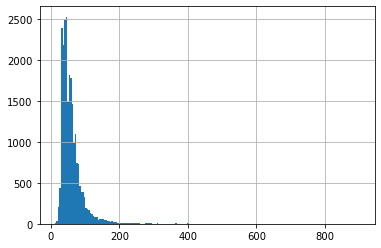

In [11]:
# Build a histogram for the area
data['total_area'].hist(bins=200, range=(data['total_area'].min(), data['total_area'].max()));

(12.0, 900.0)

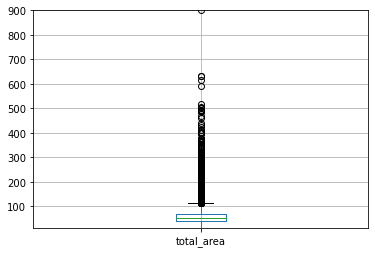

In [12]:
# Scatterplot for total area
data.boxplot(column='total_area')
plt.ylim(data['total_area'].min(),  data['total_area'].max())

(12.0, 550.0)

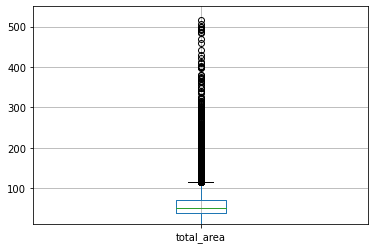

In [13]:
data.boxplot(column='total_area')
plt.ylim(data['total_area'].min(),  550)

We see that the main total area lies up to 110 m^2. Let us take this into account to further exclude anomalous values.

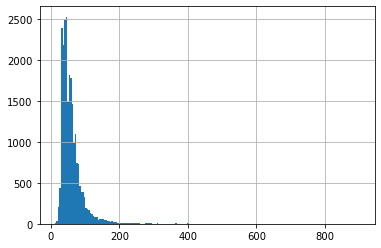

In [14]:
# Build a histogram for prices
data['total_area'].hist(bins=200, range=(data['total_area'].min(), data['total_area'].max()));

(12190.0, 763000000.0)

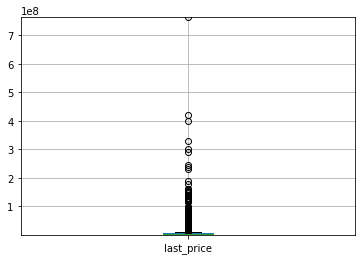

In [15]:
# Scatterplot for price
data.boxplot(column='last_price')
plt.ylim(data['last_price'].min(),  data['last_price'].max())

(12190.0, 50000000.0)

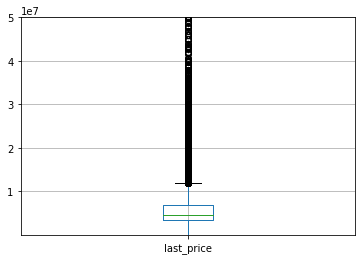

In [16]:
data.boxplot(column='last_price')
plt.ylim(data['last_price'].min(),  50000000)

Most price values fall under 10,000,000 currency units. Let's take this into account as well.

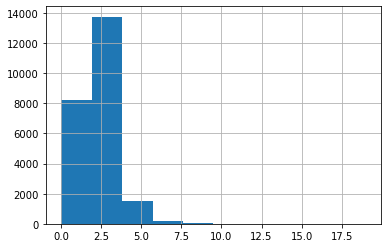

In [17]:
# Build a histogram for the number of rooms
data['rooms'].hist(bins=10, range=(data['rooms'].min(), data['rooms'].max()));

(0.0, 19.0)

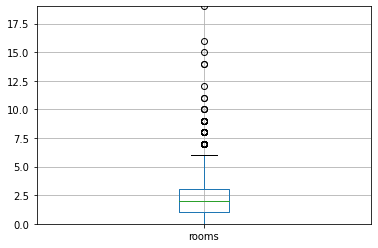

In [18]:
# Scatterplot for number of rooms
data.boxplot(column='rooms')
plt.ylim(data['rooms'].min(),  data['rooms'].max())

(0.0, 15.0)

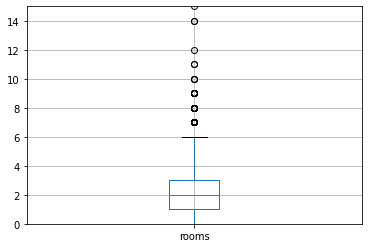

In [19]:
data.boxplot(column='rooms')
plt.ylim(data['rooms'].min(),  15)

The main number of rooms is up to 3.

(1.0, 100.0)

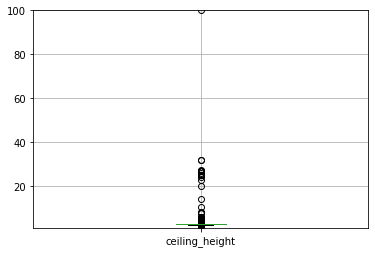

In [21]:
# Scatterplot for ceiling height
data.boxplot(column='ceiling_height')
plt.ylim(data['ceiling_height'].min(),  data['ceiling_height'].max())

(2.0, 40.0)

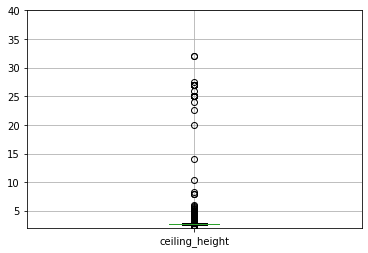

In [22]:
data.boxplot(column='ceiling_height')
plt.ylim(2,  40)

And here is the value data for most of the ceiling height values.

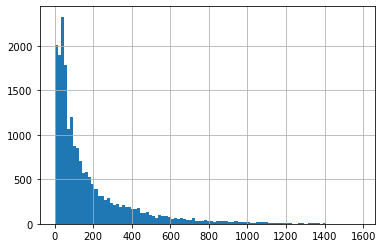

In [23]:
# Build a histogram for sale time (in days)
data['days_exposition'].hist(bins=100, range=(data['days_exposition'].min(), data['days_exposition'].max()));

(1.0, 1580.0)

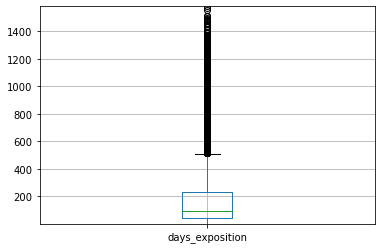

In [24]:
# Scatterplot for sale days
data.boxplot(column='days_exposition')
plt.ylim(data['days_exposition'].min(),  data['days_exposition'].max())

(1.0, 1600.0)

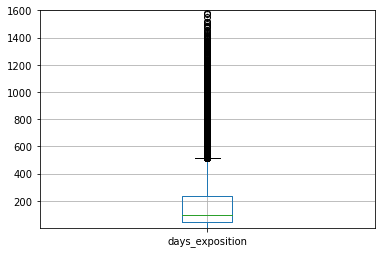

In [25]:
data.boxplot(column='days_exposition')
plt.ylim(data['days_exposition'].min(),  1600)

Now we can add the received limits to the filter by days.

In [26]:
# Calculate mean and median
days_exposition_median = data['days_exposition'].median()
days_exposition_average = data['days_exposition'].mean()

print('Median days of sale', days_exposition_median)
print('Average sales days', days_exposition_average)

Median days of sale 95.0
Average sales days 180.88863436982163


In [27]:
# Remove rare and outlier values in some columns (select values based on histogram results)

# For price
data = data[data['last_price'] <= 50000000]

# For the number of rooms
data = data[data['rooms'] <= 15]            

# For total area
data = data[data['total_area'] <= 700]     


# For ceiling height
data = data[(data['ceiling_height'] <= 40)  & (data['ceiling_height'] >= 2)]

# For sale time (days)
data = data[(data['days_exposition'] <= 1700)]

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20408 entries, 1 to 23697
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   total_images              20408 non-null  int64         
 1   last_price                20408 non-null  int32         
 2   total_area                20408 non-null  float64       
 3   first_day_exposition      20408 non-null  datetime64[ns]
 4   rooms                     20408 non-null  int64         
 5   ceiling_height            20408 non-null  float64       
 6   floors_total              20331 non-null  float64       
 7   living_area               20408 non-null  float64       
 8   floor                     20408 non-null  int64         
 9   is_apartment              20408 non-null  bool          
 10  studio                    20408 non-null  bool          
 11  open_plan                 20408 non-null  bool          
 12  kitchen_area      

Based on the histogram data and the calculated average and median values, it can be argued that the bulk of sales occur in 50 - 220 days. Anomalously high values can be considered sales from 1750 days.

### Influencing factors

Determine the factors affecting the price of an apartment. We will study the dependence on the number of square meters, the number of rooms, the floor and the distance from the center. Then we will study the dependence of the price on the date of placement.

Pearson correlation coefficient: 0.7803279592354879


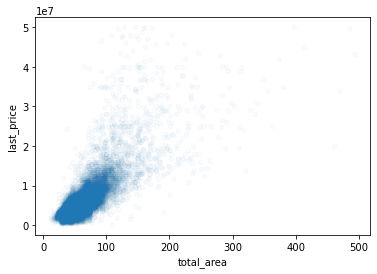

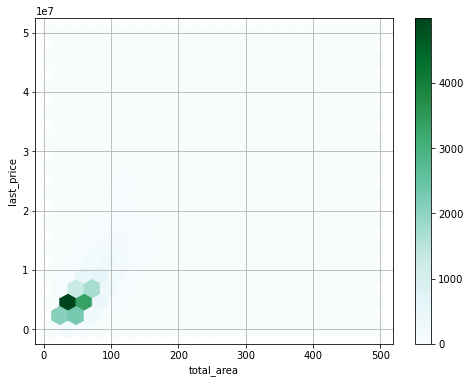

In [29]:
# Dependence of the price on the area of the object and the Pearson coefficient
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.025)
data.plot(x='total_area', y='last_price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True) 
print('Pearson correlation coefficient:', data['total_area'].corr(data['last_price']))

Pearson correlation coefficient: 0.5078606224170298


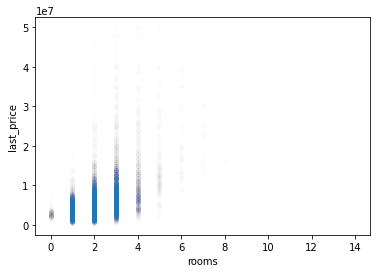

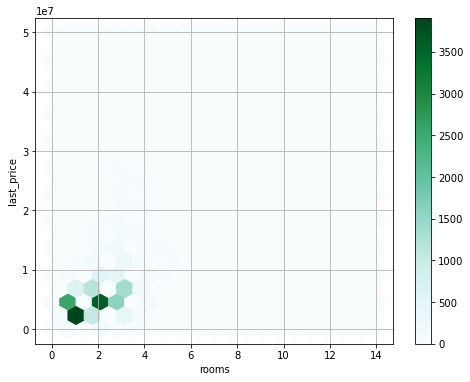

In [30]:
data.plot(x='rooms', y='last_price', kind='scatter', alpha=0.005)
data.plot(x='rooms', y='last_price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True) 
print('Pearson correlation coefficient:', data['rooms'].corr(data['last_price']))

In [31]:
data['floor_category'].fillna('другой')

1        первый
2        другой
4        другой
5        другой
6        другой
          ...  
23691    другой
23692    другой
23693    другой
23695    другой
23697    другой
Name: floor_category, Length: 20408, dtype: object

<AxesSubplot:xlabel='floor_category', ylabel='last_price'>

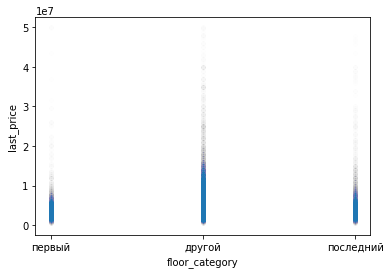

In [32]:
data.plot(x='floor_category', y='last_price', kind='scatter', alpha=0.005)

Pearson correlation coefficient: -0.32694928092071235


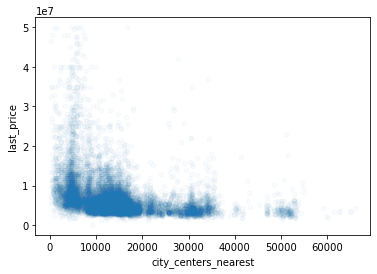

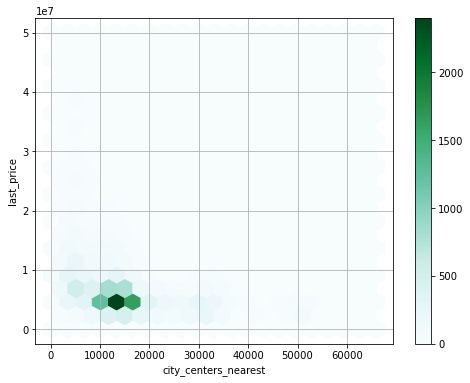

In [33]:
data.plot(x='city_centers_nearest', y='last_price', kind='scatter', alpha=0.025)
data.plot(x='city_centers_nearest', y='last_price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True) 
print('Pearson correlation coefficient:', data['city_centers_nearest'].corr(data['last_price']))

<AxesSubplot:xlabel='weekday', ylabel='last_price'>

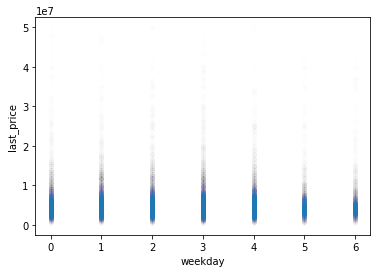

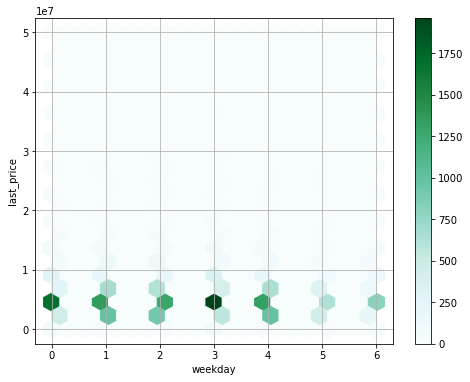

In [34]:
data.plot(x='weekday', y='last_price', kind='scatter', alpha=0.005)
data.plot(x='weekday', y='last_price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True) 

<AxesSubplot:xlabel='month', ylabel='last_price'>

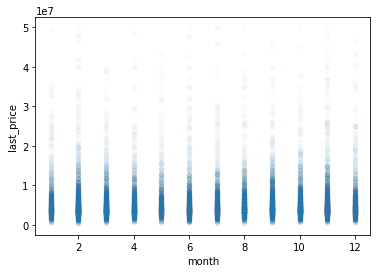

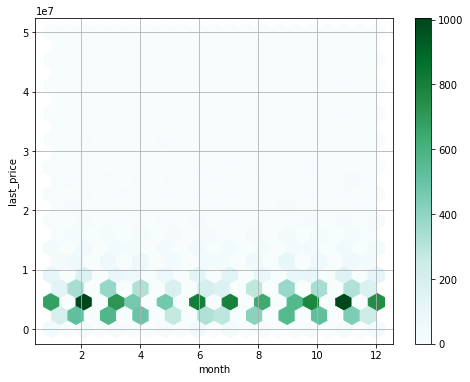

In [35]:
data.plot(x='month', y='last_price', kind='scatter', alpha=0.015)
data.plot(x='month', y='last_price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True) 

<AxesSubplot:xlabel='year', ylabel='last_price'>

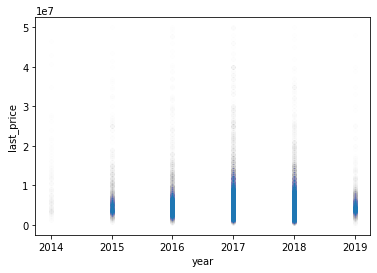

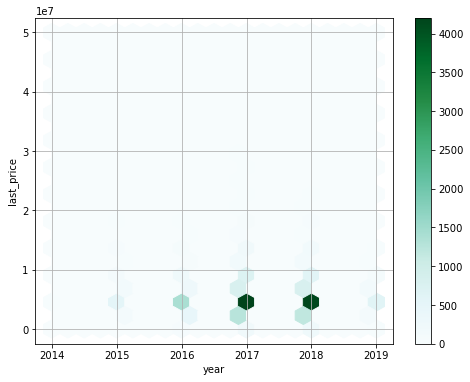

In [36]:
data.plot(x='year', y='last_price', kind='scatter', alpha=0.005)
data.plot(x='year', y='last_price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True) 

Based on the data presented above, the following conclusions can be drawn:

1. By visual assessment, you can judge that more sales occur on Monday, Wednesday and Thursday, and then Monday.
2. Dependence on the year of publication is present - the greatest results in 2017 and 2018.
3. For the distance from the center, the Pearson coefficient is negative, which indicates that the price rises with a decrease to the center.
4. The number of rooms and the total area have the greatest dependence. Dependence on the floor is observed on all, except for 1 and the last.

### Analysis by settlements

In [37]:
# Determine the settlements we need and write them to the dataframe
data_sort = pd.DataFrame({'announcement_count': data.value_counts('locality_name').head(10)}).reset_index()

# Slice by necessary settlements
data_slice = data_sort['locality_name']

In [38]:
# Display the resulting values in a table
(
    data.query('locality_name in @data_slice')
    .pivot_table(aggfunc='mean', index='locality_name', values='square_area_price').sort_values('square_area_price', ascending=False)
)

,square_area_price
locality_name,
Санкт-Петербург,109897.062015
Пушкин,102074.188925
деревня Кудрово,92473.086957
посёлок Парголово,89504.615894
посёлок Мурино,85817.926499
посёлок Шушары,78009.705882
Колпино,74864.931818
Всеволожск,68570.150442
Гатчина,67927.873134


From the data obtained, the following conclusion can be drawn: the highest price per square meter is St. Petersburg, and the lowest is Vyborg.

### Study of apartments in St. Petersburg

In [39]:
# Remove all "extra" declarations from the dataframe
data = data[(data['locality_name'] == 'Санкт-Петербург')].copy()
data['city_centers_nearest_km'] = (data['city_centers_nearest'] / 1000).round(0)
data = data[data['city_centers_nearest_km'].notna()]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13505 entries, 2 to 23697
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   total_images              13505 non-null  int64         
 1   last_price                13505 non-null  int32         
 2   total_area                13505 non-null  float64       
 3   first_day_exposition      13505 non-null  datetime64[ns]
 4   rooms                     13505 non-null  int64         
 5   ceiling_height            13505 non-null  float64       
 6   floors_total              13444 non-null  float64       
 7   living_area               13505 non-null  float64       
 8   floor                     13505 non-null  int64         
 9   is_apartment              13505 non-null  bool          
 10  studio                    13505 non-null  bool          
 11  open_plan                 13505 non-null  bool          
 12  kitchen_area      

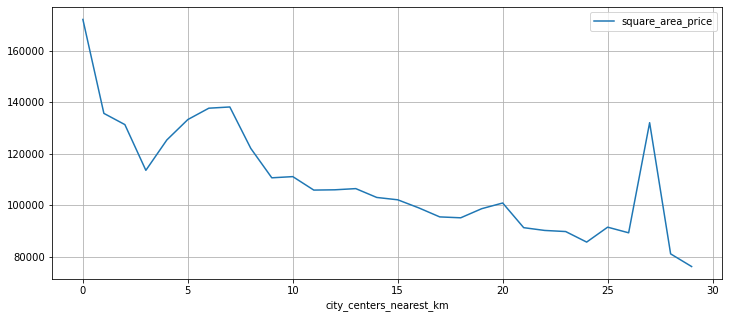

In [40]:
(
    data.pivot_table(aggfunc='mean', index='city_centers_nearest_km', values='square_area_price')
    .plot(grid=True, figsize=(12, 5))
);

Based on the graph, the center can be considered a circle with a radius of 9 km.

### Research apartments in the center

In [41]:
# Select a segment of apartments in the center
data = data[data['city_centers_nearest_km'] <= 9]

<AxesSubplot:>

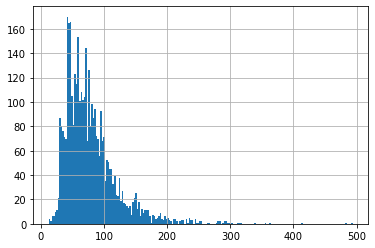

In [42]:
# Build a histogram of the area
data['total_area'].hist(bins=200, range=(data['total_area'].min(), data['total_area'].max()))

<AxesSubplot:>

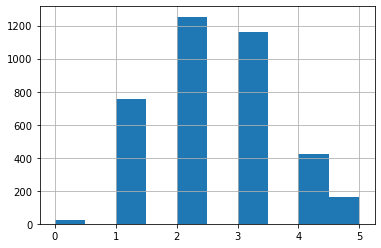

In [43]:
# Build a histogram for the number of rooms
data['rooms'].hist(bins=10, range=(0, 5))

<AxesSubplot:>

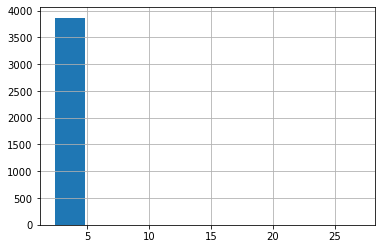

In [44]:
# Plot a histogram for the ceiling height
data['ceiling_height'].hist(bins=10, range=(data['ceiling_height'].min(), data['ceiling_height'].max()))

<AxesSubplot:>

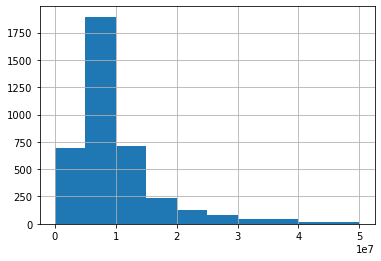

In [45]:
# Build a histogram for prices
data['last_price'].hist(bins=10, range=(data['last_price'].min(), data['last_price'].max()))

Pearson correlation coefficient: 0.7467429865740709


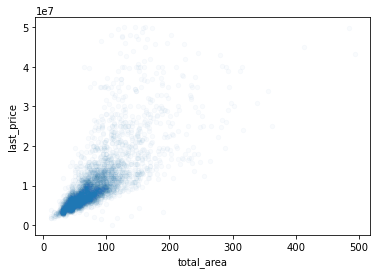

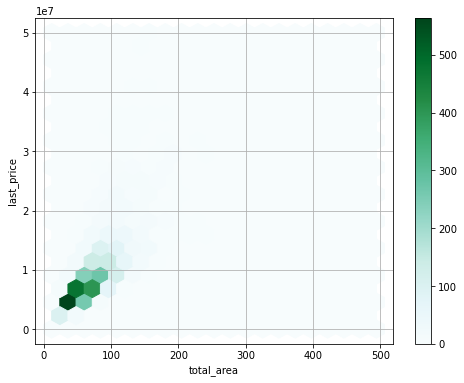

In [46]:
# Dependence of the price on the area of the object and the Pearson coefficient
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.025)
data.plot(x='total_area', y='last_price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True) 
print('Pearson correlation coefficient:', data['total_area'].corr(data['last_price']))

Pearson correlation coefficient: 0.4931551102171642


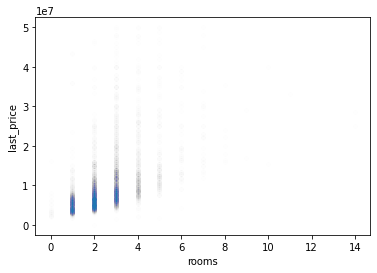

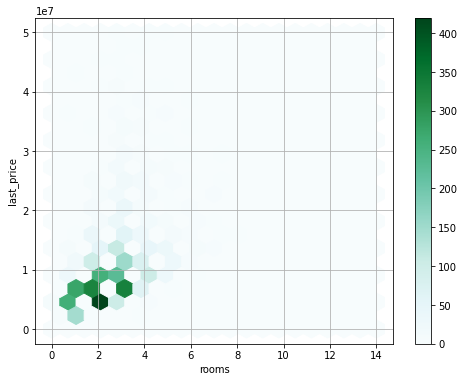

In [47]:
data.plot(x='rooms', y='last_price', kind='scatter', alpha=0.005)
data.plot(x='rooms', y='last_price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True) 
print('Pearson correlation coefficient:', data['rooms'].corr(data['last_price']))

<AxesSubplot:xlabel='floor_category', ylabel='last_price'>

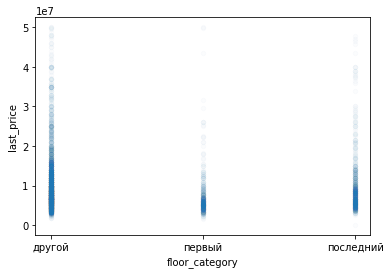

In [48]:
data.plot(x='floor_category', y='last_price', kind='scatter', alpha=0.015)

Pearson correlation coefficient: -0.18835743140617076


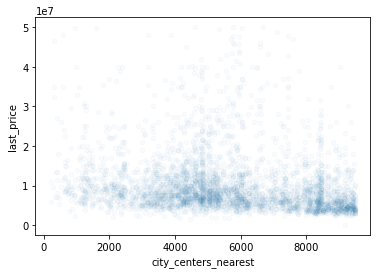

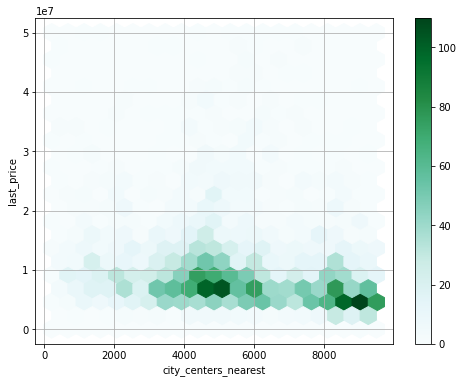

In [49]:
data.plot(x='city_centers_nearest', y='last_price', kind='scatter', alpha=0.025)
data.plot(x='city_centers_nearest', y='last_price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True) 
print('Pearson correlation coefficient:', data['city_centers_nearest'].corr(data['last_price']))

<AxesSubplot:xlabel='year', ylabel='last_price'>

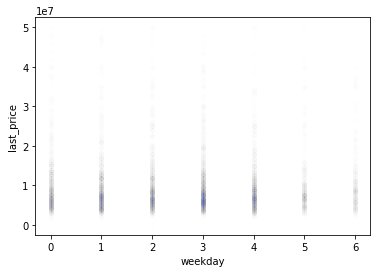

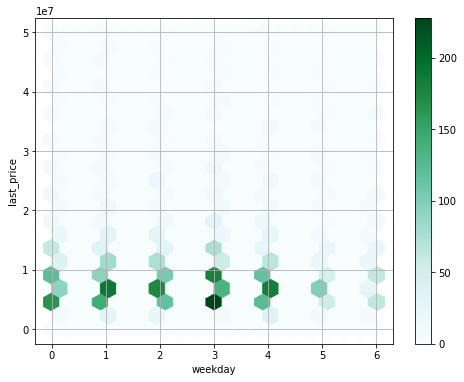

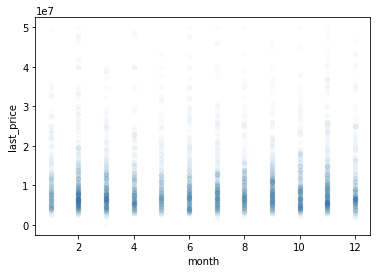

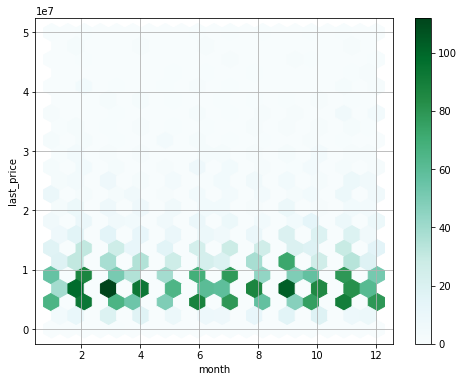

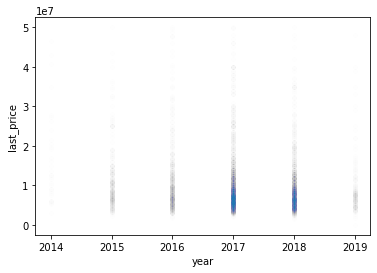

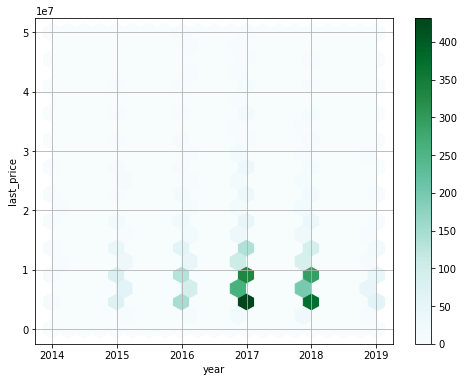

In [50]:
data.plot(x='weekday', y='last_price', kind='scatter', alpha=0.005)
data.plot(x='weekday', y='last_price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True) 

data.plot(x='month', y='last_price', kind='scatter', alpha=0.015)
data.plot(x='month', y='last_price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True) 

data.plot(x='year', y='last_price', kind='scatter', alpha=0.005)
data.plot(x='year', y='last_price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True) 

Judging by the results of data analysis for apartments in the center, all parameters are more interconnected than for proposals in the rest of the database.
For sales in the center, apartment sales are distributed more evenly by days of the week and months than in the rest of the dataset.
However, the largest number of sales also fell on 2017 and 2018.

## General conclusion


In this work, an analysis of the database on real estate objects was carried out. The following conclusions can be drawn:

1. The dependence on the day and month for the entire dataset is more pronounced than for apartments in the center. However, there is little difference depending on the year.
2. The dependence on the city center is much stronger for St. Petersburg, but for the entire database it remains the main criterion for price changes.
3. The dependence of the price on the area is also stronger in the center of St. Petersburg than in the rest. And also is the main criterion.
4. Dependence on the number of rooms in St. Petersburg, on the contrary, is less than in other settlements.

All dependencies were evaluated by comparing the Pearson coefficients for each case and visually evaluating the resulting histograms.